# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

## Шаг 1. Откройте файл с данными и изучите общую информацию

1. Загрузите данные из csv-файла в датафрейм c помощью библиотеки pandas.
2. Изучите общую информацию о полученном датафрейме.
3. Постройте гистограмму для всех числовых столбцов таблицы на одном графике. Например, для датафрейма data можно построить такую гистограмму командой data.hist(figsize=(15, 20)). Напомним, что параметр figsize задаёт размер графика.

**Импортируем библиотеку pandas. Считаем данные из csv-файла `real_estate_data.csv` и сохраним в переменную `data`**

In [94]:
#Импортируем нужные библиотеки

import matplotlib.pyplot as plt
import pandas as pd

In [95]:
#вывести все столбцы в датафрейме
pd.set_option("display.max_columns", None) 
data = pd.read_csv('real_estate_data.csv', sep='\t')

**Выведем первые 10 строчек датафрейма**

In [96]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

**Выведем основную информацию о датафрейме**

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Всего 23699 строчек в датафрейме. Заметим, что не во всех столбцах такое количество строк. Возможно, что среди них есть пропущенные значения.**

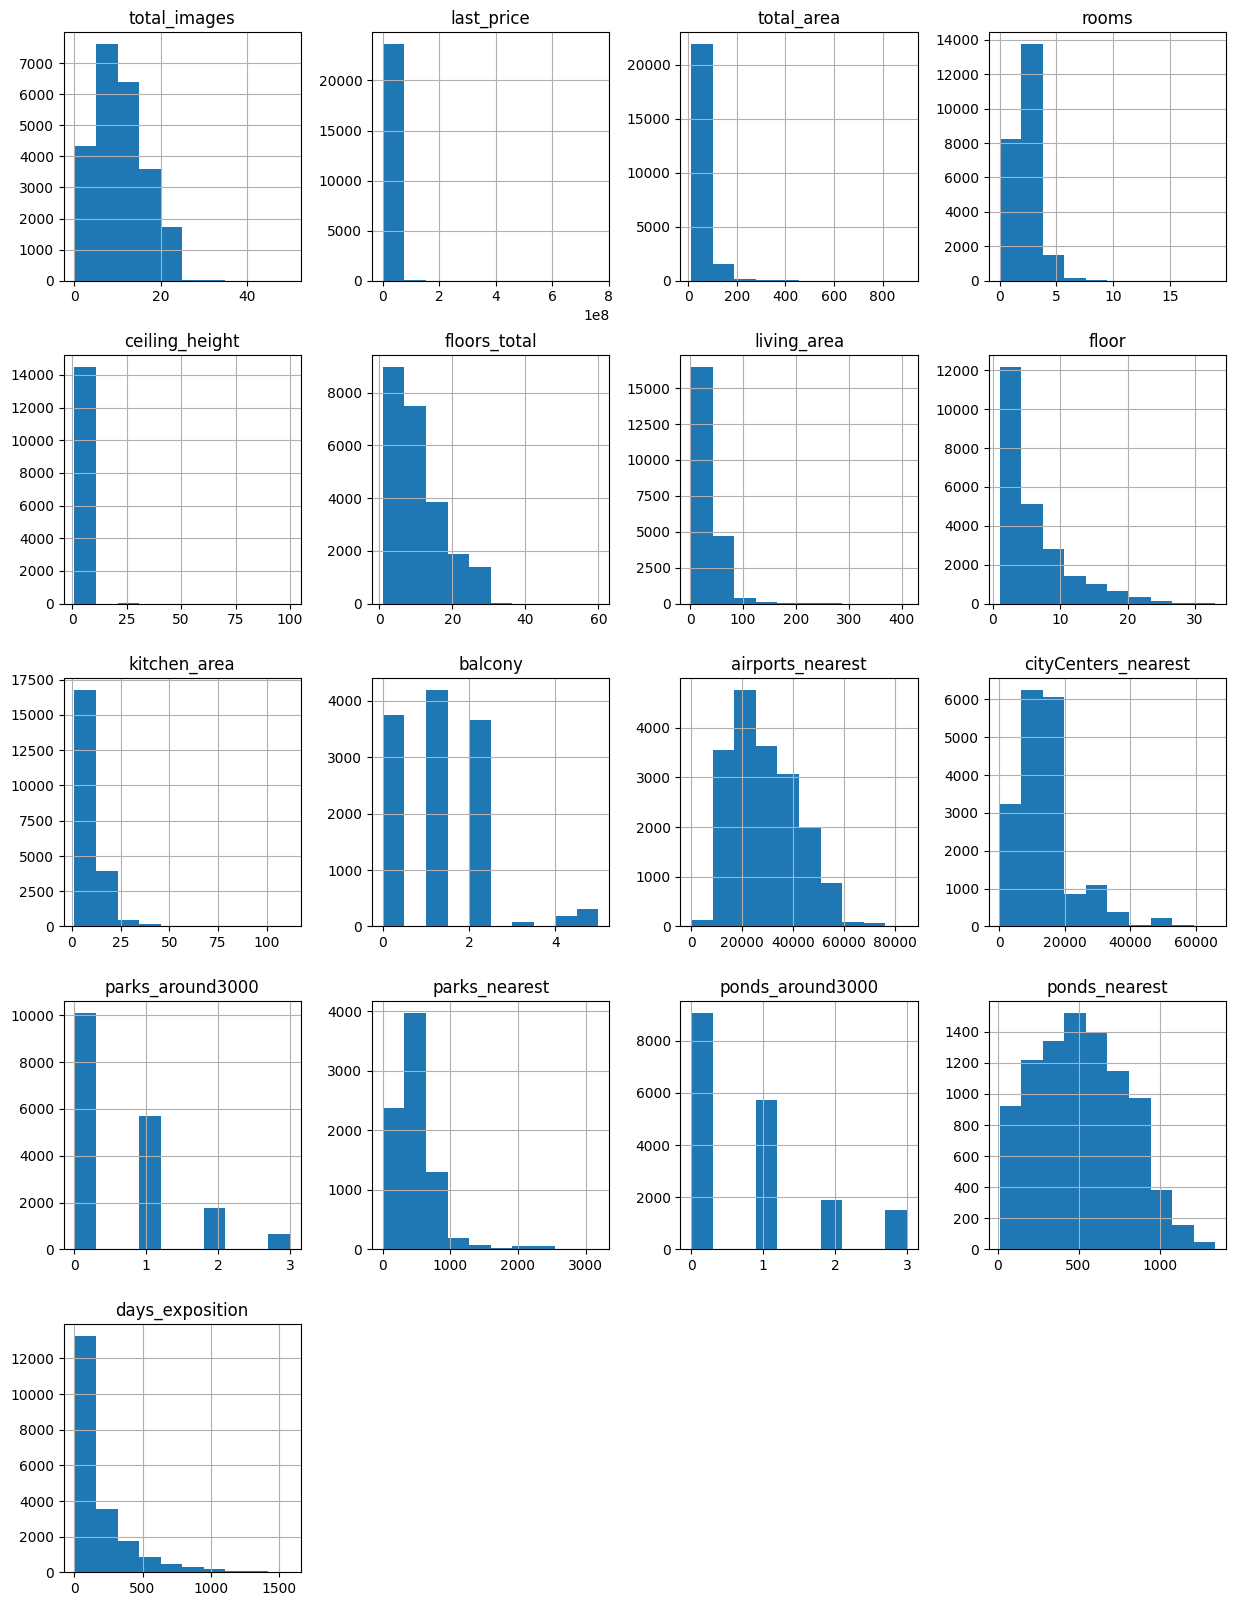

In [98]:
data.hist(figsize=(15, 20))
plt.show()

**Вывод:**

Мы сохранили файл в переменную, прочитали данные и вывели основную информацию о таблице. Всего 23699 строк и 22 столбца в датафрейме. Видим, что во многих столбцах есть пропущенные значения, которые нужно в дальнейшем проработать. Также надо привести есть столбцы, в которых нужно преобразовать тип данных. 

## Шаг 2. Выполните предобработку данных

1. Найдите и изучите пропущенные значения в столбцах:
 - Определите, в каких столбцах есть пропуски.
 - Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски можно заменить на число 0. Если логичную замену предложить невозможно, то оставьте пропуски. Пропущенные значения — тоже важный сигнал, который нужно учитывать.
- В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

2. Рассмотрите типы данных в каждом столбце:
 - Найдите столбцы, в которых нужно изменить тип данных.
 - Преобразуйте тип данных в выбранных столбцах.
 - В ячейке с типом markdown поясните, почему нужно изменить тип данных.

3. Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.
Подсказка

**Найдем количество пропущенных значений для каждого столбца**

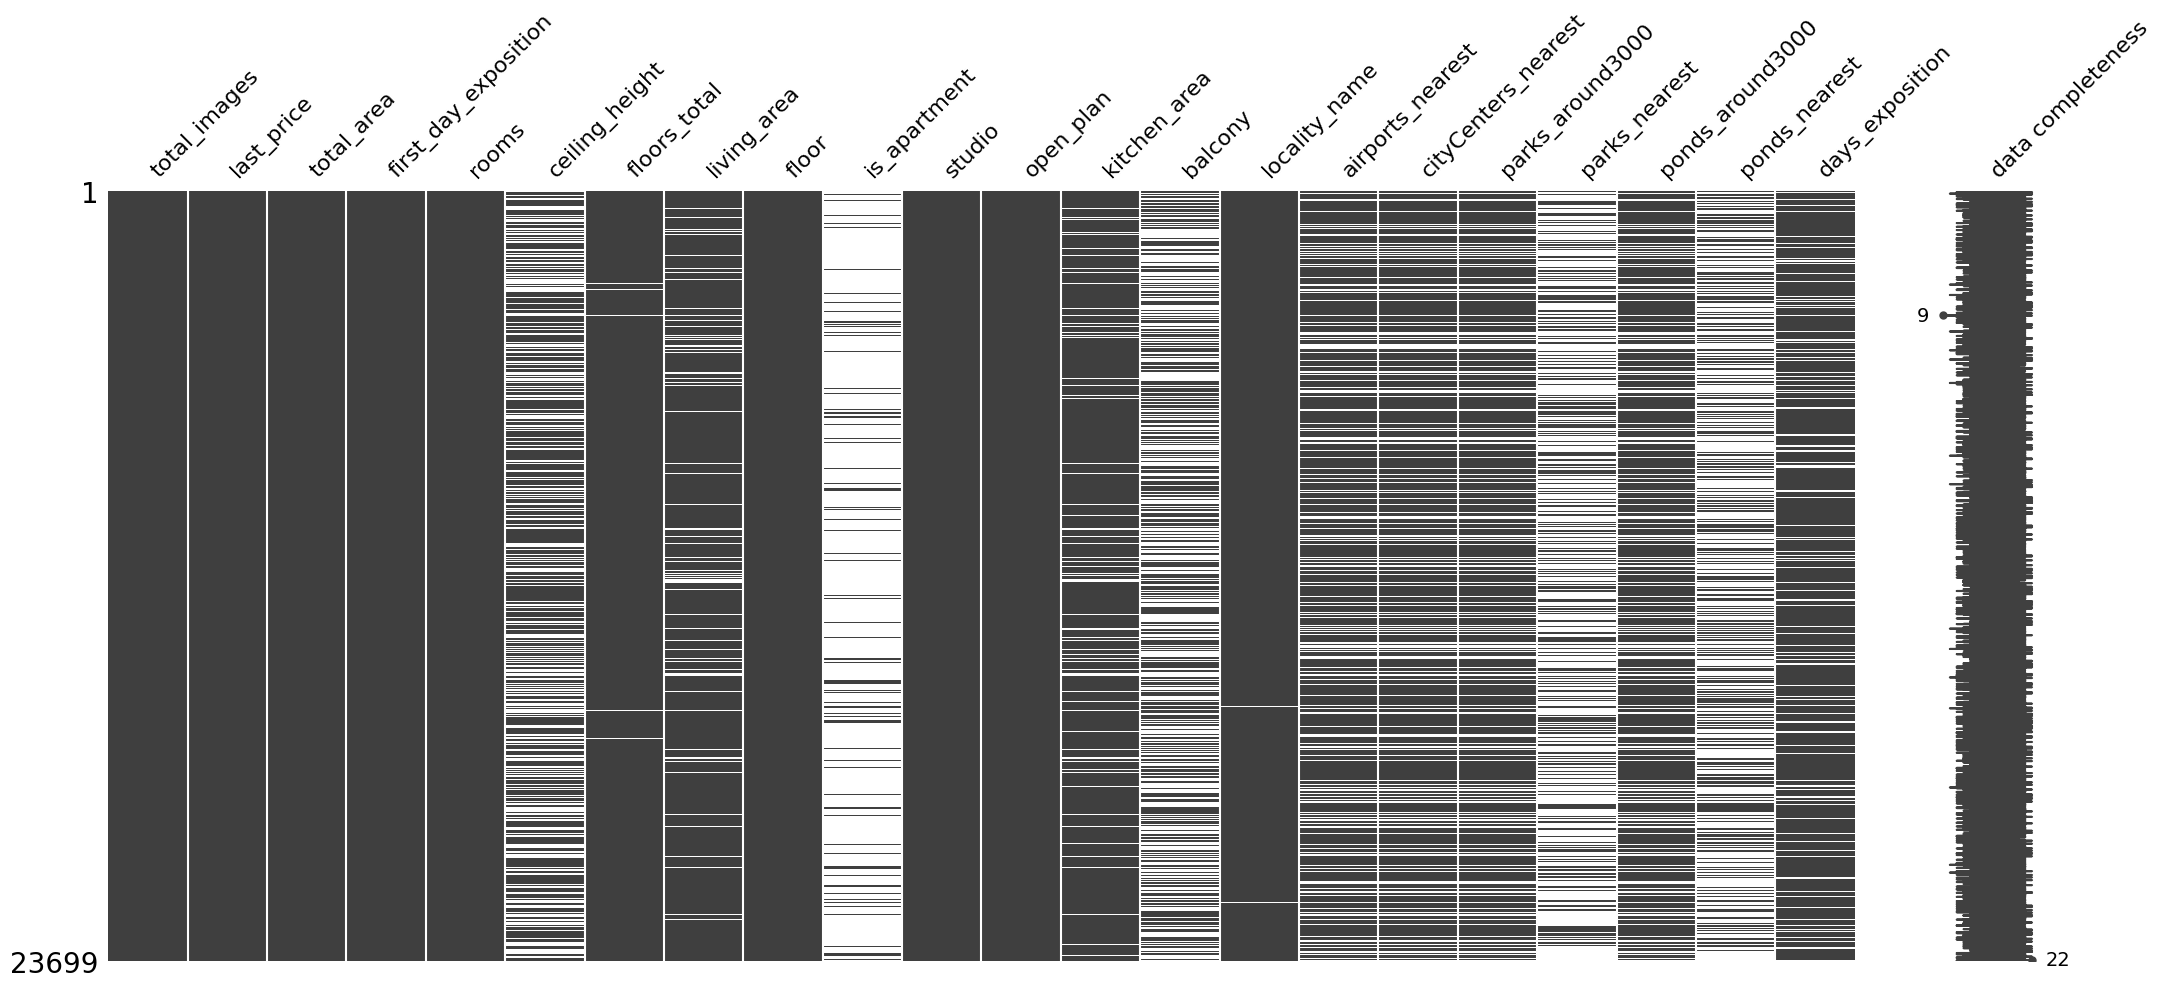

In [99]:
import missingno as msno

msno.matrix(data, labels=True)
plt.show()

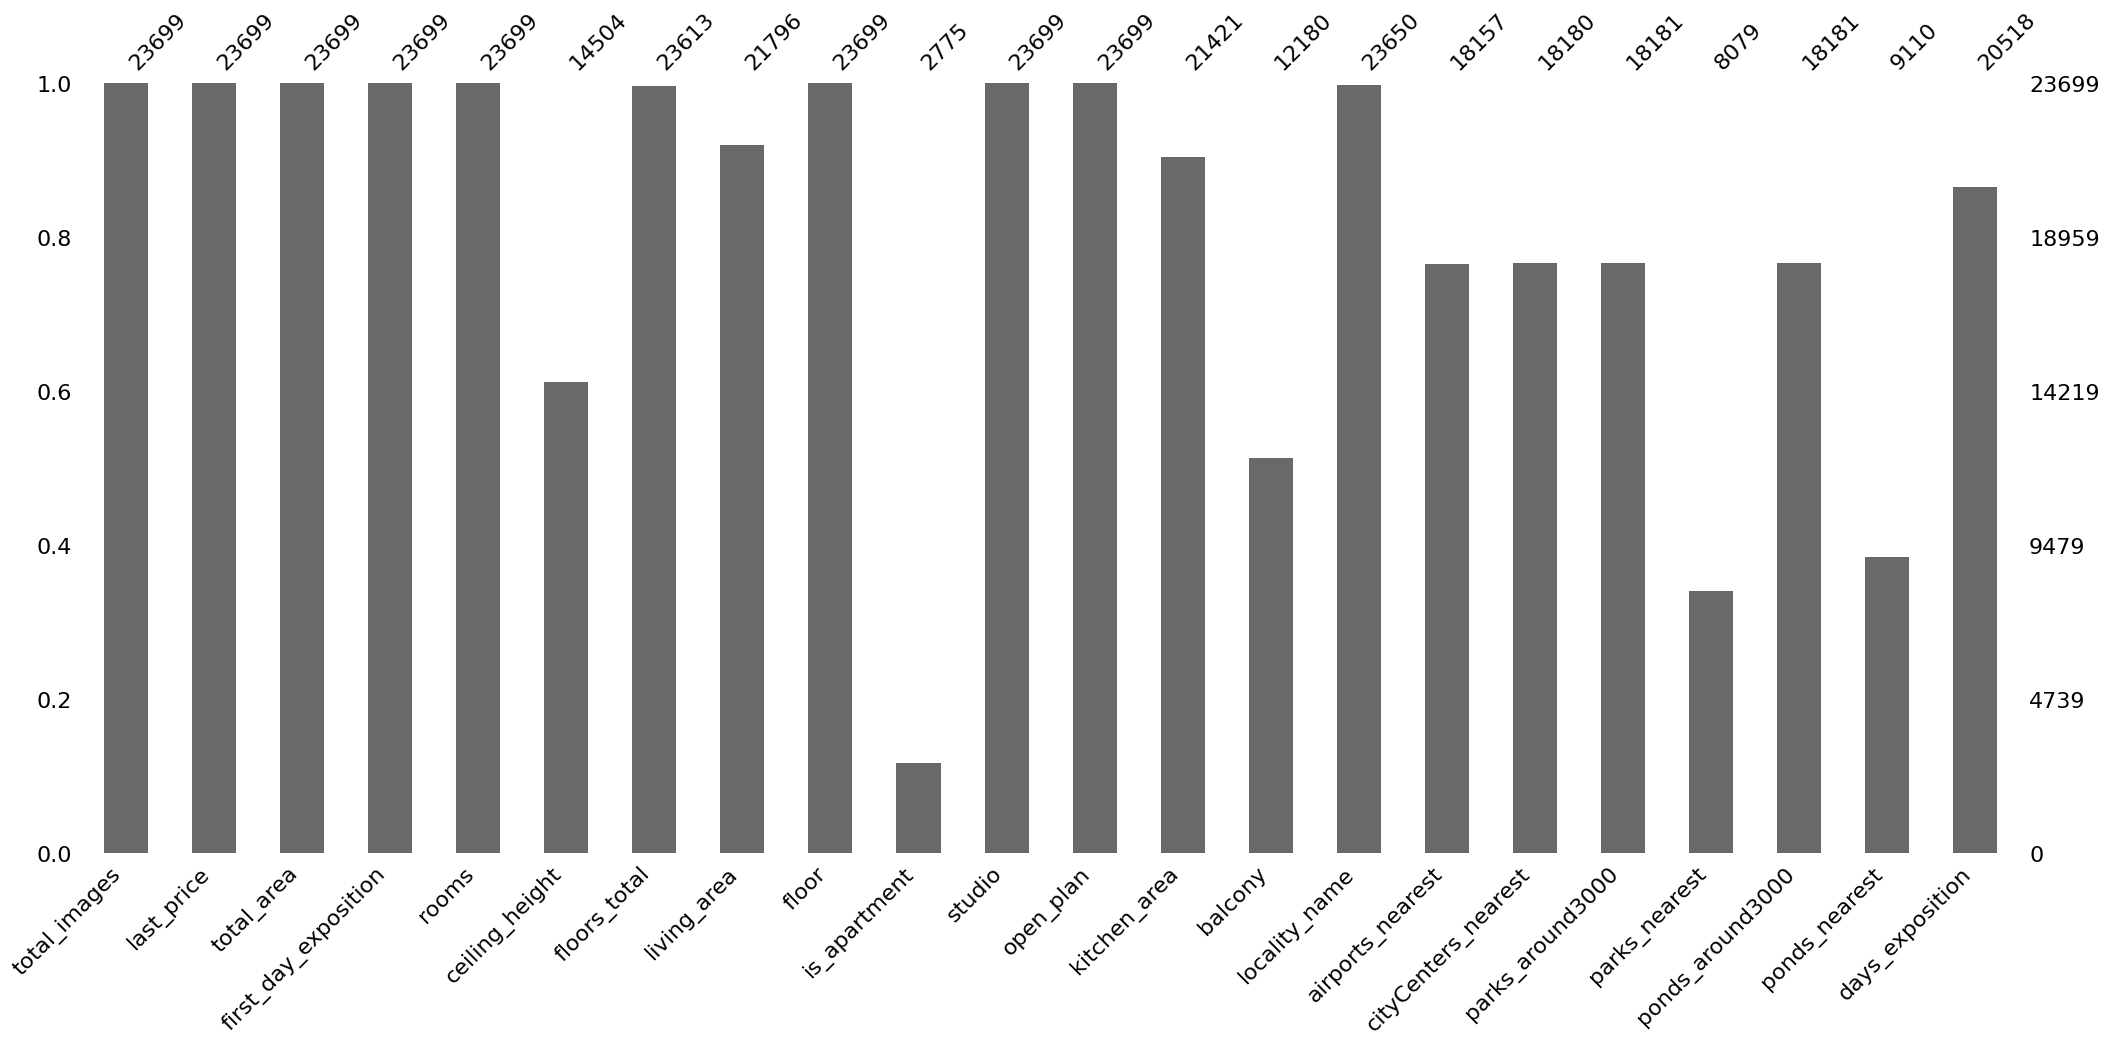

In [100]:
msno.bar(data)
plt.show()

На графиках видно, что столбцы `total_images`, `last_price`, `total_area`, `first_day_exposition`, `rooms`, `floor`, `studio`, `open_plan`, `kitchen_area` полностью заполнены, в них нет пропущенных значений, но в остальных столбцах есть пропущенные значения, которые мы заполним по возможности. 

Видим, что в 14 столбцах из 22 есть пропущенные значения. Давайте попробуем заполнить пропуски там, где это возможно.

1. В столбце `ceiling_height` (9195 пропусков из 23699) есть аномальные значения: высота потолков в некоторых домах больше 20м, но скорее всего это вещественные значения. Избавимся от таких значений, а потом заполним пропуски медианным значением.
2. В столбце `floors_total` - количество этажей; всего 86 пропусков из 23699, нечем их заполнить, поэтому пропуски оставим как есть
3. В столбце `living_area` (1903 пропусков из 23699): найдем медианное значение жилой площади одной комнаты и заполним пропуски этим значением, умноженным на количество комнат в доме
4. В столбце `is_apartment` лежат True, False и пропущенные значение, и все пропуски мы заменим на False.
5. В столбце `balcony` содержатся данные о количестве балконов, и если балкона нету, то значение в строчке пропущенное, поэтому мы заменим все пропуски в этом столбце на 0. 
6. В столбце `kitchen_area` (площадь кухни): 2278 пропусков из 23699, заполнить пропущенные значения нечем, поэтому так и оставляем
7. В столбце `locality_name` - местонахождение; после удаления неявных дубликатов, избавимся от пропущенных значений
8. В столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` данные были получены на основе картографических данных, возможно, что в геосервисах не нашлось информации, поэтому появились пропуски. Пропуски в этих столбцах нам заполнить нечем, поэтому оставляем
9. В столбце `days_exposition` - количество дней с объявления; наверное, произошла техническая ошибка, и не для всех объявлений заполнен этот столбец, хотя данные должно быть были получены автоматически. Возможно, что когда данные были скачаны, объявление еще было не закрыто, то есть недвижмость была еще на продаже. 

In [101]:
#высота потолков
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height'] / 10
print("Медианная высота потолков:", data['ceiling_height'].median())
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
print("Количество пропусков:", data['ceiling_height'].isna().sum())

Медианная высота потолков: 2.65
Количество пропусков: 0


In [102]:
#столбец living_area - жилая площадь
living_area_pivot_table = data.groupby('rooms')['living_area'].mean().reset_index()
mean_living_area = living_area_pivot_table['living_area'].sum() / living_area_pivot_table['rooms'].sum()
print('Медианное значение жилой площади одной комнаты', mean_living_area)

for rooms_num in data['rooms'].unique():
    data.loc[(data['rooms'] == rooms_num) & (data['living_area'].isna()), 'living_area'] = rooms_num * mean_living_area

Медианное значение жилой площади одной комнаты 18.97310554486483


In [103]:
#столбец is_apartment и balcony
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)

#проверим теперь количество пропущенных значений в этих двух столбцах
print(data['is_apartment'].isna().sum())
print(data['balcony'].isna().sum())

0
0


C:\Users\Abina Kukanova\AppData\Local\Temp\ipykernel_8788\1169428144.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['is_apartment'] = data['is_apartment'].fillna(False)


**Рассмотрим типы данных в каждом столбце, опять воспользуемся методом info()**

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

 - В столбце `firs_day_exposition` записана дата публикация, но в формате object, поэтому давайте поменяем на datetime. 
 - В столбце `last_price` цена недвижимости записана в формате float64, поменяем на int64. То же самое проделаем и со столбцом `balcony`, так как в этом столбце указано количество балконов, а количество у нас не может быть в формате float64. 

In [105]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data[['last_price', 'balcony']] = data[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))

#еще раз выведем общую информацию по датафрейму и посмотрим изменился ли тип данных в столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Посмотрим уникальные значения столбца `locality_name` и обработаем неявные дубликаты в этом столбце, чтобы после удалить их из данных**

**Сделаем следующие замены, с помощью метода `replace`:**

- поселок на посёлок
- удалим "городского типа" и "городского типа имени"
- удалим "при железнодорожной"
- удалим "коттеджный"
- удалим "городской"

Изначально было 365 уникальных значений в столбце с названиями, после удаления неявных дубликатов стало 320 уникальных значений. 

In [106]:
len(data['locality_name'].unique()) 

365

In [107]:
# закомментирует и перепишем код через цикл
"""data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data['locality_name'] = data['locality_name'].str.replace('городского типа имени ', '')
data['locality_name'] = data['locality_name'].str.replace('городского типа ', '')
data['locality_name'] = data['locality_name'].str.replace('городской ', '')
data['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')
data['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')"""

"data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')\ndata['locality_name'] = data['locality_name'].str.replace('городского типа имени ', '')\ndata['locality_name'] = data['locality_name'].str.replace('городского типа ', '')\ndata['locality_name'] = data['locality_name'].str.replace('городской ', '')\ndata['locality_name'] = data['locality_name'].str.replace('при железнодорожной ', '')\ndata['locality_name'] = data['locality_name'].str.replace('коттеджный ', '')"

In [108]:
locality_names = [
    ('поселок', 'посёлок'),
    ('городского типа имени ', ''),
    ('городского типа ', ''),
    ('городской ', ''),
    ('при железнодорожной ', ''),
    ('коттеджный ', '')
]

# Перебор строк для замены
for old_name, new_name in locality_names:
    data['locality_name'] = data['locality_name'].str.replace(old_name, new_name)

In [109]:
len(data['locality_name'].unique())  

320

In [110]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [111]:
#удалим пропущенные значения
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [112]:
print('Количество строк в датафрейме:', data.shape[0])

Количество строк в датафрейме: 23650


**Вывод:** 

Мы нашли и посчитали пропущенные значения в столбцах, избавились от них там, где это было возможно, а именно в стобцах `ceiling_height`, `living_area`, `is_apartment`, `balcony`, `locality_name`. Преобразовалт тип данных в `first_day_exposition`, `last_price`, `balcony`. Изучили уникальные значения в столбце с названиями населенных пунктов и удалили неявные дубликаты. 

## Шаг 3. Добавьте в таблицу новые столбцы со следующими параметрами

- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [113]:
data['price_per_one_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [114]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

In [115]:
def get_floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_category'] = data.apply(get_floor_category, axis=1)

In [116]:
data['cityCenter_km']  = (data['cityCenters_nearest'] / 1000).round()

**Проверим, что у нас получилось, выведем первые 10 строчек датафрейма**

In [117]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_one_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,cityCenter_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.00,2015-07-24,3,2.65,14.0,56.919317,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.400000,5,False,False,False,9.10,0,посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.79,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,2.65,26.0,10.600000,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,2.65,24.0,37.946211,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,2.65,27.0,15.430000,26,False,False,False,8.81,0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.76,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.600000,7,False,False,False,6.50,2,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,6,2,2017,другой,15.0


## Шаг 4. Проведите исследовательский анализ данных:

**1. Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.**

**Список параметров:**
- **общая площадь;**
- **жилая площадь;**
- **площадь кухни;**
- **цена объекта;**
- **количество комнат;**
- **высота потолков;**
- **тип этажа квартиры («первый», «последний», «другой»);**
- **общее количество этажей в доме;**
- **расстояние до центра города в метрах;**
- **расстояние до ближайшего парка**

**Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.**

**Высота потолков**

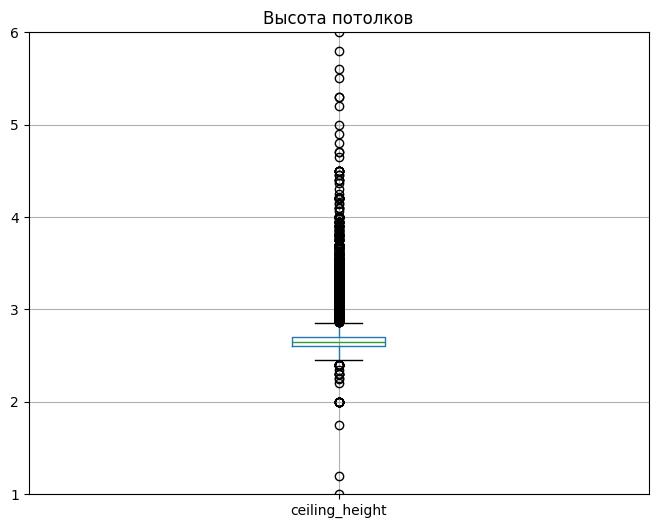

In [118]:
#Рассмотрим сначала столбец ceiling_height
data.boxplot(column='ceiling_height', grid = True, figsize = (8, 6))
plt.ylim(1, 6)
plt.title('Высота потолков')
plt.show()

Чтобы отфильтровать датасет и удалить выбросы, вычислим первый и третий квартили, межквартальный размах, нижнюю и верхнюю границы. Построим гистограмму от "верхнего уса" и и где по гистограмме начинаются "выпадения", то там начинаются нетиповые, единичные для исследуемых данных значения и примерно с момента первого "выпадения" можно значения признавать выбросами и аномалиями.

In [28]:
Q1 = data['ceiling_height'].describe()['25%'] # первый квартиль Q1
Q3 = data['ceiling_height'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR
print('Нижняя граница:', lower_edge)
print('Верхняя граница:', upper_edge)

Нижняя граница: 2.45
Верхняя граница: 2.8500000000000005


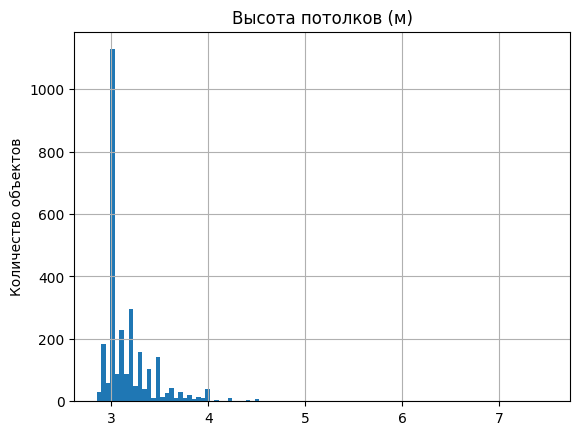

In [29]:
#построим гистограмму от "верхнего уса"
data[(data['ceiling_height'] > upper_edge)]['ceiling_height'].hist(bins=100, range=(upper_edge, 7.5))
plt.title('Высота потолков (м)')
plt.ylabel('Количество объектов')
plt.show()

In [30]:
#оставим данные, которые больше меньшей границы и меньше 4
data = data.query('ceiling_height > @lower_edge and ceiling_height <= 4')

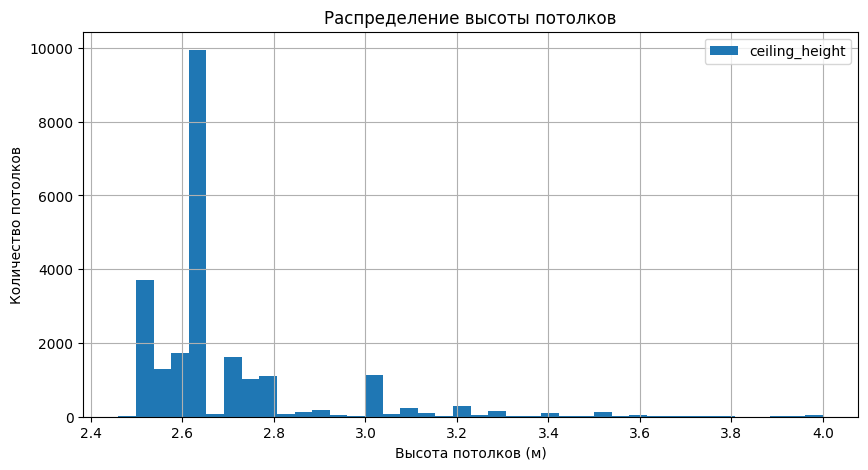

In [31]:
#построим гистограмму для высоты потолков 
data.plot(
    kind='hist',
    y='ceiling_height',
    grid=True,
    figsize=(10,5),
    bins=40
)
plt.title('Распределение высоты потолков')
plt.ylabel('Количество потолков')
plt.xlabel('Высота потолков (м)')
plt.show()

In [32]:
#посмотрим на общий анализ высоты потолков
data['ceiling_height'].describe()

count    23535.000000
mean         2.694124
std          0.203818
min          2.460000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Удалили выбросы и оставили объекты недвижмости, чьи потолки входят в диапозон от 2,45м до 4м. Среднее значение - 2,69м, медиана - 2,65. Чуть меньше 10 тысяч потолков имеют высоту 2,65 метров. 

**Общая площадь**

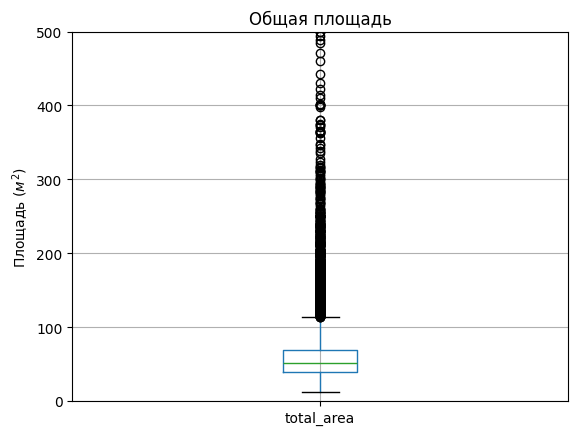

In [33]:
plt.ylim(0, 500)
data.boxplot(column='total_area')
plt.title('Общая площадь')
plt.ylabel('Площадь ($м^2$)')
plt.show()

In [34]:
Q1 = data['total_area'].describe()['25%'] # первый квартиль Q1
Q3 = data['total_area'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR
print('Нижняя граница:', lower_edge)
print('Верхняя граница:', upper_edge)

Нижняя граница: -4.550000000000004
Верхняя граница: 114.25


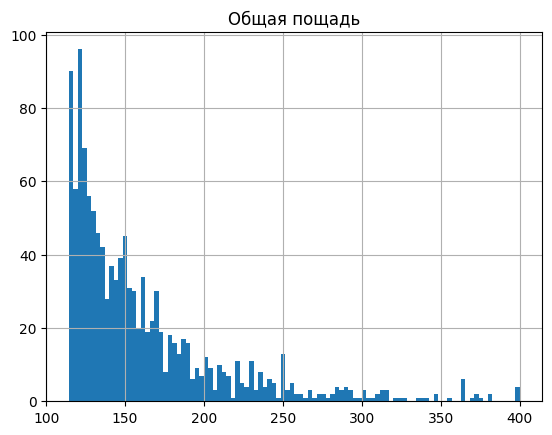

In [35]:
data[(data['total_area'] > upper_edge)]['total_area'].hist(bins=100, range=(upper_edge, 400))
plt.title('Общая пощадь')
plt.show()

In [36]:
#оставим данные, которые больше меньшей границы и меньше 330
data = data.query('total_area > @lower_edge and total_area < 330')

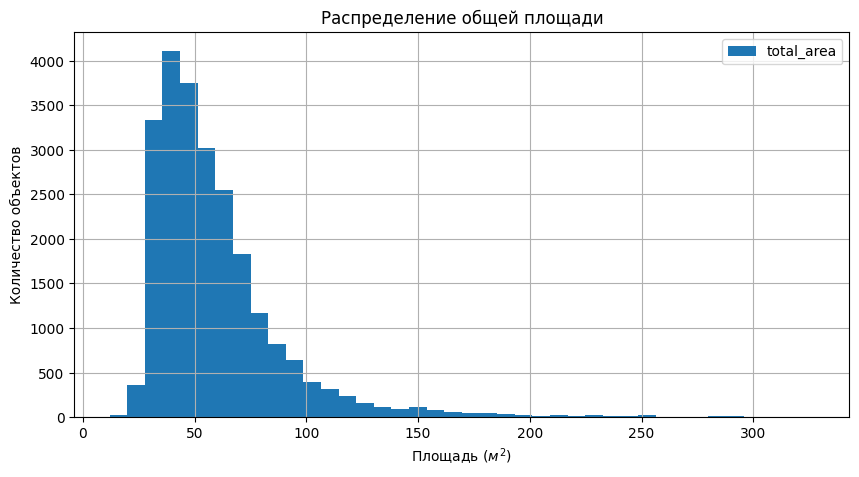

In [37]:
#построим гистограмму для общей площади
data.plot(
    kind='hist',
    y='total_area',
    grid=True,
    figsize=(10,5),
    bins=40
)
plt.title('Распределение общей площади')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь ($м^2$)')
plt.show()

In [38]:
data['total_area'].describe()

count    23493.000000
mean        59.512565
std         30.960056
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        327.200000
Name: total_area, dtype: float64

Оставляем в данных только те объекты, чья общая площадь не больше 330 $м^2$. Среднее значение - 59 $м^2$, медиана - 52 $м^2$. 

**Жилая площадь**

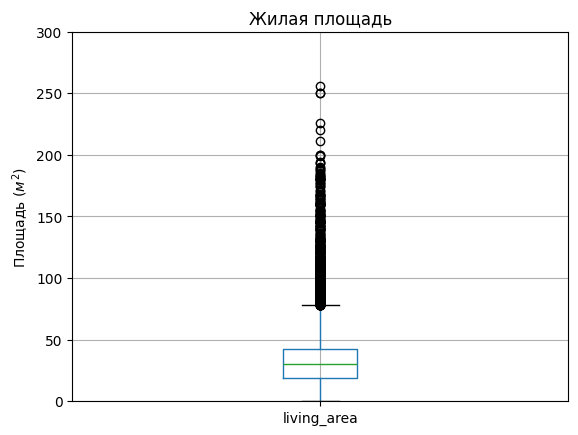

In [39]:
plt.ylim(0, 300)
data.boxplot(column='living_area')
plt.title('Жилая площадь')
plt.ylabel('Площадь ($м^2$)')
plt.show()

In [40]:
Q1 = data['living_area'].describe()['25%'] # первый квартиль Q1
Q3 = data['living_area'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR
print('Нижняя граница:', lower_edge)
print('Верхняя граница:', upper_edge)

Нижняя граница: -16.31723613783793
Верхняя граница: 77.79034168270276


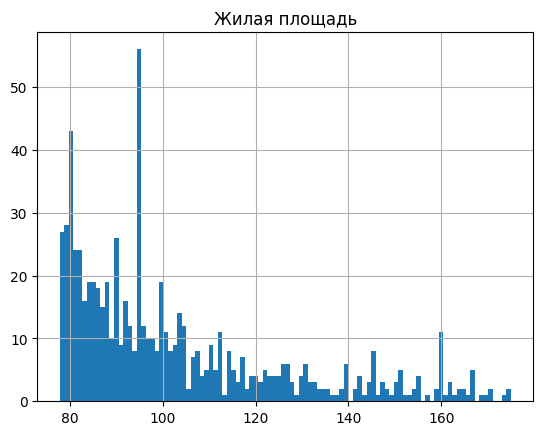

In [41]:
data[(data['living_area'] > upper_edge)]['living_area'].hist(bins=100, range=(upper_edge, 175))
plt.title('Жилая площадь')
plt.show()

In [42]:
#оставим данные, которые больше меньшей границы и меньше 140
data = data.query('living_area > @lower_edge and living_area < 140')

In [43]:
print('Количество строк в датасете:', data.shape[0])

Количество строк в датасете: 23377


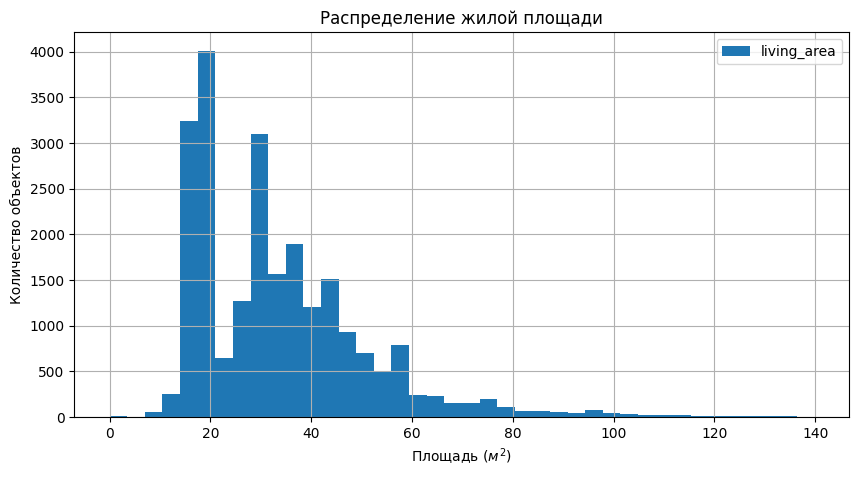

In [44]:
#построим гистограмму для жилой площади
data.plot(
    kind='hist',
    y='living_area',
    grid=True,
    figsize=(10,5),
    bins=40
)
plt.title('Распределение жилой площади')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь ($м^2$)')
plt.show()

In [45]:
data['living_area'].describe()

count    23377.000000
mean        33.776499
std         17.783304
min          0.000000
25%         18.973106
50%         30.120000
75%         42.200000
max        139.800000
Name: living_area, dtype: float64

Оставим в датасете только те объекты, чья площадь не больше 140 $м^2$. Среднее значение равно 33 $м^2$, медиана 30 $м^2$. 

**Площадь кухни**

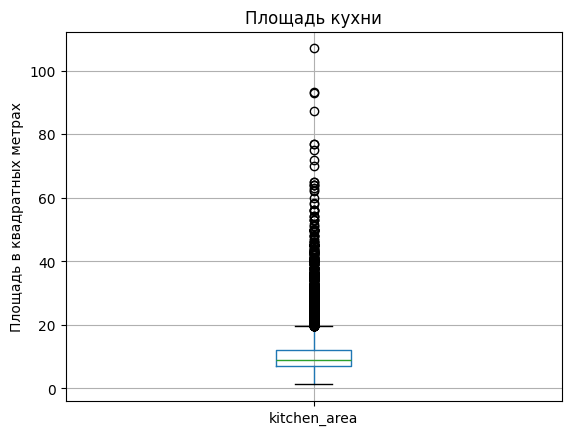

In [46]:
#рассмотрим столбец с площадью кухни, нарисуем диаграмму размаха
data.boxplot(column="kitchen_area")
plt.title('Площадь кухни')
plt.ylabel('Площадь в квадратных метрах')
plt.show()

In [47]:
Q1 = data['kitchen_area'].describe()['25%'] # первый квартиль Q1
Q3 = data['kitchen_area'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR
print('Нижняя граница:', lower_edge)
print('Верхняя граница:', upper_edge)

Нижняя граница: -0.5
Верхняя граница: 19.5


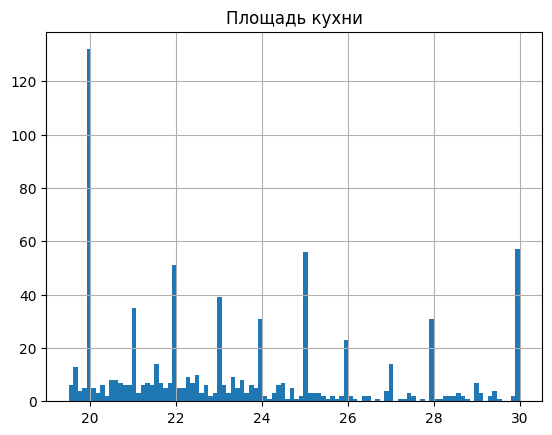

In [48]:
data[(data['kitchen_area'] > upper_edge)]['kitchen_area'].hist(bins=100, range=(upper_edge, 30))
plt.title('Площадь кухни')
plt.show()

In [49]:
#оставим данные, которые больше меньшей границы и меньше 26
data = data.query('kitchen_area > @lower_edge and kitchen_area < 26')

In [50]:
print('Количество строк в датасете:', data.shape[0])

Количество строк в датасете: 20693


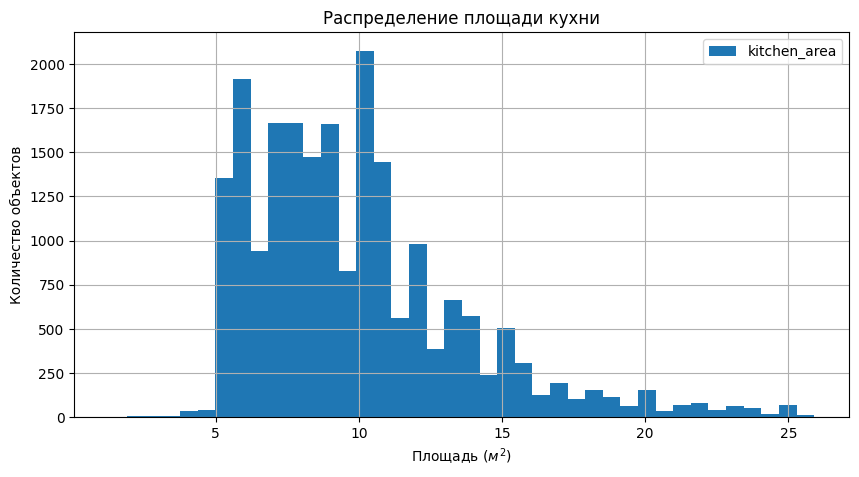

In [51]:
#построим гистограмму для площади кухни
data.plot(
    kind='hist',
    y='kitchen_area',
    grid=True,
    figsize=(10,5),
    bins=40
)
plt.title('Распределение площади кухни')
plt.ylabel('Количество объектов')
plt.xlabel('Площадь ($м^2$)')
plt.show()

In [52]:
data['kitchen_area'].describe()

count    20693.000000
mean         9.874678
std          3.755384
min          1.300000
25%          7.000000
50%          9.000000
75%         11.500000
max         25.900000
Name: kitchen_area, dtype: float64

Будем рассматривать только те объекты, чья площадь кухни не больше 26 $м^2$. Среднее значение - около 10 $м^2$, медианное значение - 9 $м^2$

**Цена объекта**

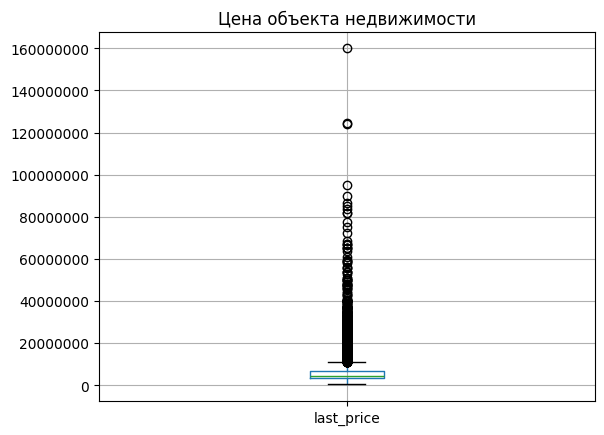

In [53]:
#рассмотрим столбец с ценой объекта, нарисуем диаграмму размаха
data.boxplot(column="last_price")
plt.ticklabel_format(style='plain', axis='y')
plt.title('Цена объекта недвижимости')
plt.show()

In [54]:
#найдем нижнию и верхнюю границы для цены объекта недвижимости
Q1 = data['last_price'].describe()['25%'] # первый квартиль Q1
Q3 = data['last_price'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

-1150000.0
11170000.0


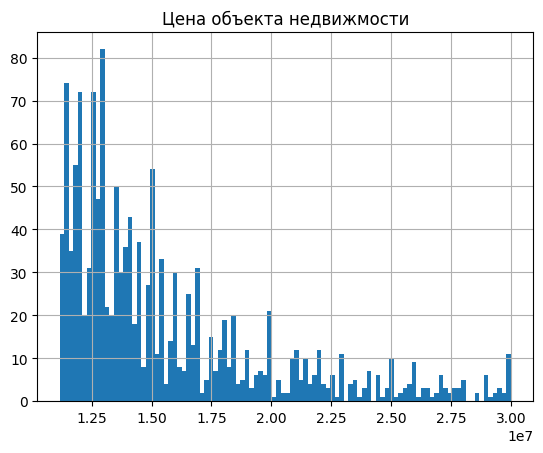

In [55]:
data[(data['last_price'] > upper_edge)]['last_price'].hist(bins=100, range=(upper_edge, 30000000))
plt.title('Цена объекта недвижмости')
plt.show()

In [56]:
#оставим данные, которые больше 0 и меньше верхней
data = data.query('last_price > 0 and last_price < 22500000')

In [57]:
print('Количество строк в датасете:', data.shape[0])

Количество строк в датасете: 20423


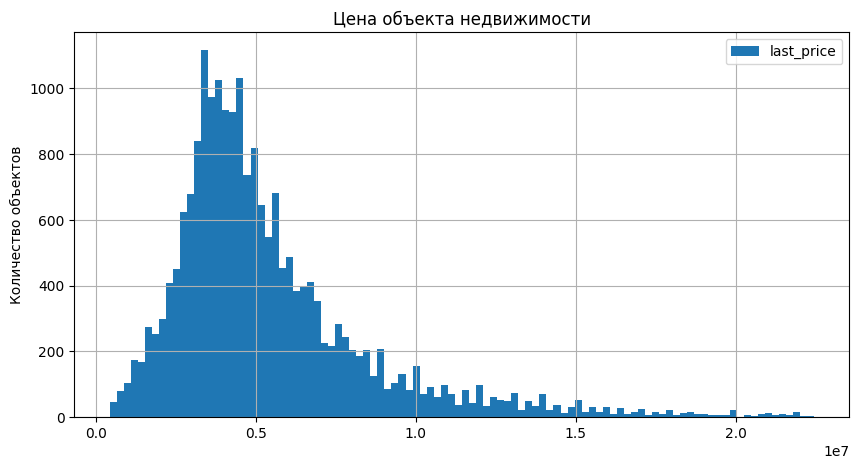

In [58]:
# посмотрим гистограмму для цены объекта
data.plot(
    kind='hist',
    y='last_price',
    grid=True,
    figsize=(10,5),
    bins=100
)
plt.title('Цена объекта недвижимости')
plt.ylabel('Количество объектов')
plt.show()

In [59]:
data['last_price'].describe()

count    2.042300e+04
mean     5.421868e+06
std      3.189179e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.600000e+06
75%      6.490000e+06
max      2.245000e+07
Name: last_price, dtype: float64

В датасете оставим только цены меньше 22500000. Среднее значение - 5421868, медиана - 4600000.

**Количество комнат**

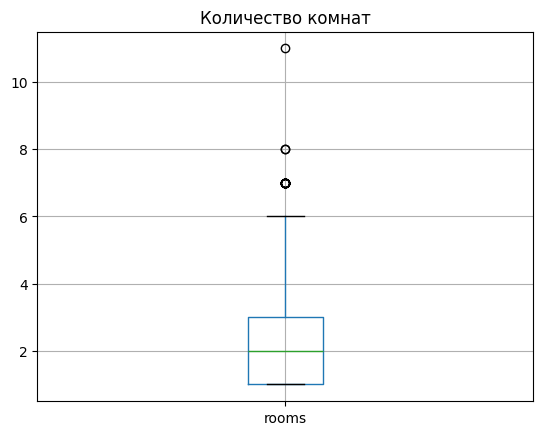

In [60]:
#рассмотрим столбец с количество комнат, нарисуем диаграмму размаха
data.boxplot(column="rooms")
plt.title('Количество комнат')
plt.show()

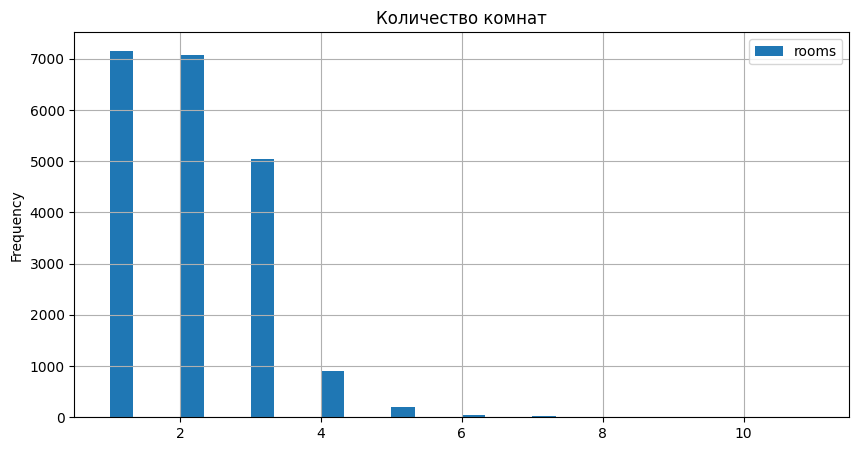

In [61]:
#построим гистограмму для количества комнат объекта недвижимости
data.plot(
    kind='hist',
    y='rooms',
    grid=True,
    figsize=(10,5),
    bins=30
)
plt.title('Количество комнат')
plt.show()

**Тип этажа квартиры**

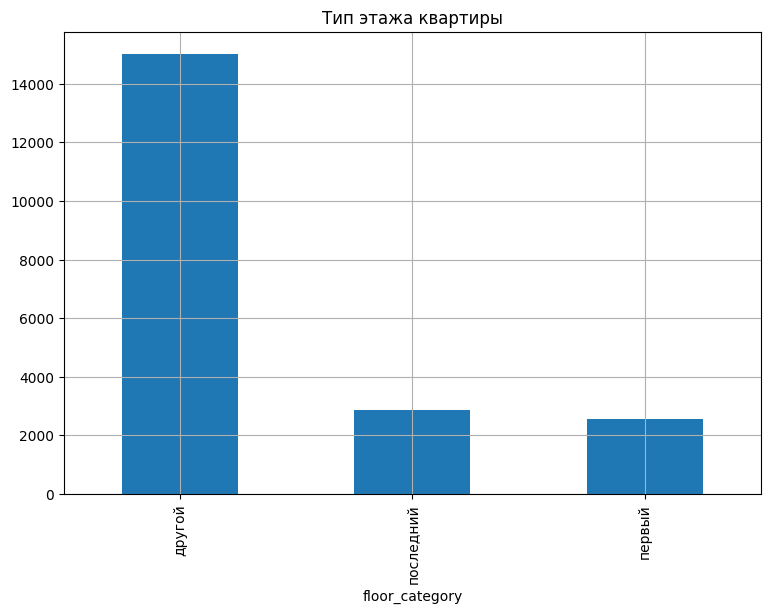

In [62]:
data['floor_category'].value_counts().plot(
        kind='bar',
        grid=True,
        figsize=(9,6)
)
plt.title('Тип этажа квартиры')
plt.show()

**Общее количество этажей в доме**

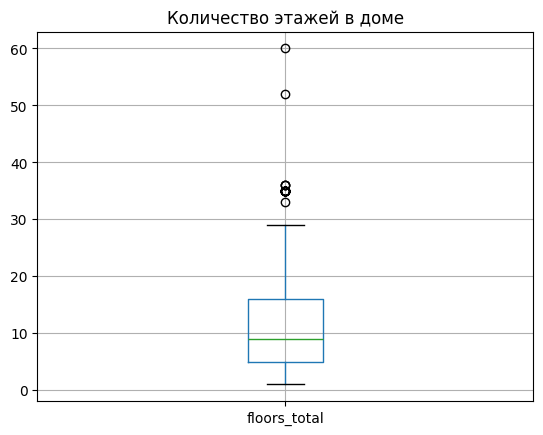

In [63]:
#рассмотрим столбец с количеством этажей, нарисуем диаграмму размаха
data.boxplot(column="floors_total")
plt.title('Количество этажей в доме')
plt.show()

In [64]:
#найдем нижнию и верхнюю границы 
Q1 = data['floors_total'].describe()['25%'] # первый квартиль Q1
Q3 = data['floors_total'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

#оставим данные, которые больше нуля и меньше верхней границы
data = data.query('floors_total > 0 and floors_total < @upper_edge')

-11.5
32.5


In [65]:
print('Количество строк в датасете:', data.shape[0])

Количество строк в датасете: 20359


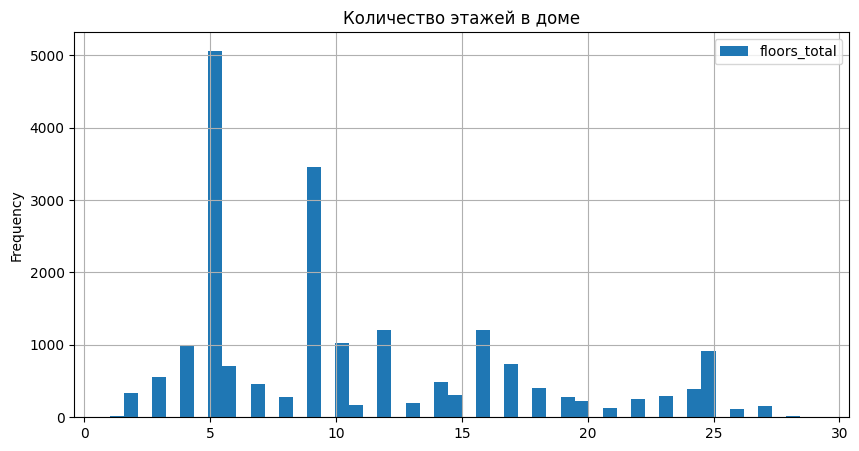

In [66]:
data.plot(
    kind='hist',
    y='floors_total',
    grid=True,
    figsize=(10,5),
    bins=50
)
plt.title('Количество этажей в доме')
plt.show()

Оставили только те значения `floors_total`, которые больше нуля и меньше верхней границы

**Расстояние до центра города в метрах**

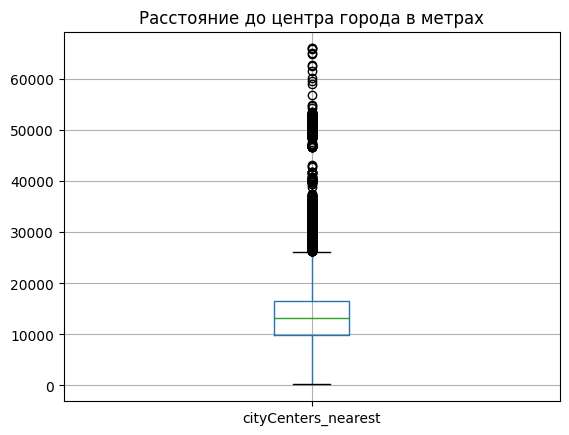

In [67]:
data.boxplot(column="cityCenters_nearest")
plt.title('Расстояние до центра города в метрах')
plt.show()

In [68]:
#найдем нижнию и верхнюю границы 
Q1 = data['cityCenters_nearest'].describe()['25%'] # первый квартиль Q1
Q3 = data['cityCenters_nearest'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

145.75
26203.75


<Axes: >

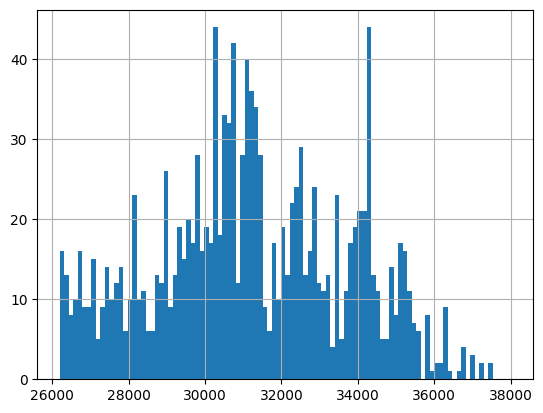

In [69]:
data[(data['cityCenters_nearest'] > upper_edge)]['cityCenters_nearest'].hist(bins=100, range=(upper_edge, 38000))

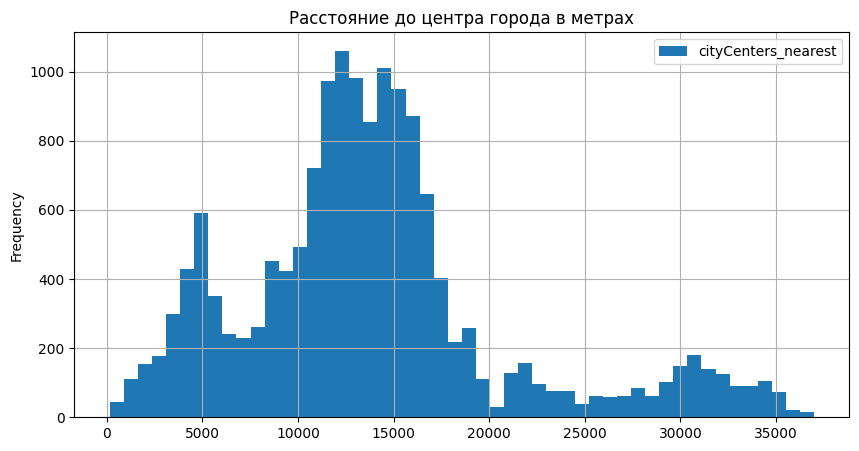

In [70]:
# построим гистограмму 
# будем рассматривать данные, которые больше нижней границы и меньше 37000
data.plot(
    kind='hist',
    y='cityCenters_nearest',
    grid=True,
    figsize=(10,5),
    bins=50,
    range=(lower_edge, 37000)
)
plt.title('Расстояние до центра города в метрах')
plt.show()

In [71]:
data['cityCenters_nearest'].describe()

count    15627.000000
mean     14555.994305
std       8615.275130
min        208.000000
25%       9917.500000
50%      13279.000000
75%      16432.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Будем рассматривать расстояние от 145 метров до 37000 метров. Среднее значение - 13888, медиана - 13204. 

**Расстояние до ближайшего парка**

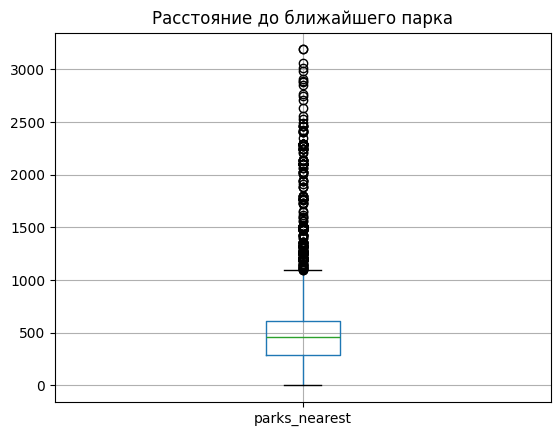

In [72]:
data.boxplot(column="parks_nearest")
plt.title('Расстояние до ближайшего парка')
plt.show()

In [73]:
#найдем нижнию и верхнюю границы 
Q1 = data['parks_nearest'].describe()['25%'] # первый квартиль Q1
Q3 = data['parks_nearest'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR

print(lower_edge)
print(upper_edge)

-194.5
1097.5


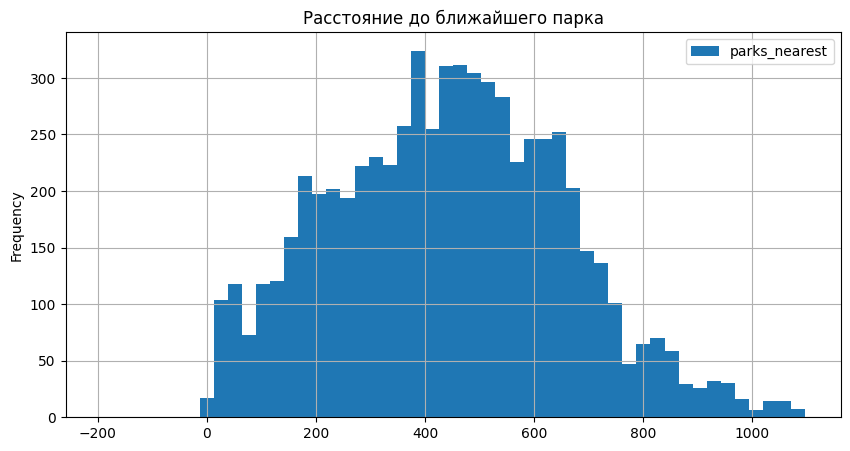

In [74]:
data.plot(
    kind='hist',
    y='parks_nearest',
    grid=True,
    figsize=(10,5),
    bins=50,
    range=(lower_edge, upper_edge)
)
plt.title('Расстояние до ближайшего парка')
plt.show()

In [75]:
data['parks_nearest'].describe()

count    6762.000000
mean      490.863058
std       335.178683
min         1.000000
25%       290.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Будем рассматривать расстояние до 1096 метров. Среднее значение - 444 метров, медиана - 446 метров.

Посчитаем сколько осталось строчек в датафрейм после удаления выбросов. Изначально было 23699 строк. 

In [76]:
print('Количество строк в датасете:', data.shape[0])

Количество строк в датасете: 20359


**2. Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.**

- **Постройте гистограмму.**
- **Посчитайте среднее и медиану.**
- **В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?**

Нижняя граница: -239.5
Верхняя граница: 516.5


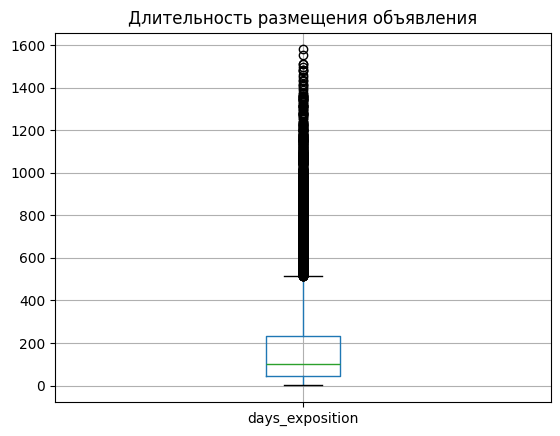

In [77]:
Q1 = data['days_exposition'].describe()['25%'] # первый квартиль Q1
Q3 = data['days_exposition'].describe()['75%'] # третий квартиль Q3
IQR = Q3 - Q1 # межквартильный размах IQR
lower_edge = Q1 - 1.5 * IQR
upper_edge = Q3 + 1.5 * IQR
print('Нижняя граница:', lower_edge)
print('Верхняя граница:', upper_edge)

data.boxplot(column="days_exposition")
plt.title('Длительность размещения объявления')
plt.show()

In [78]:
#оставим данные, которые больше нуля и меньше верхней границы
data = data.query('days_exposition > 0 and days_exposition < @upper_edge')

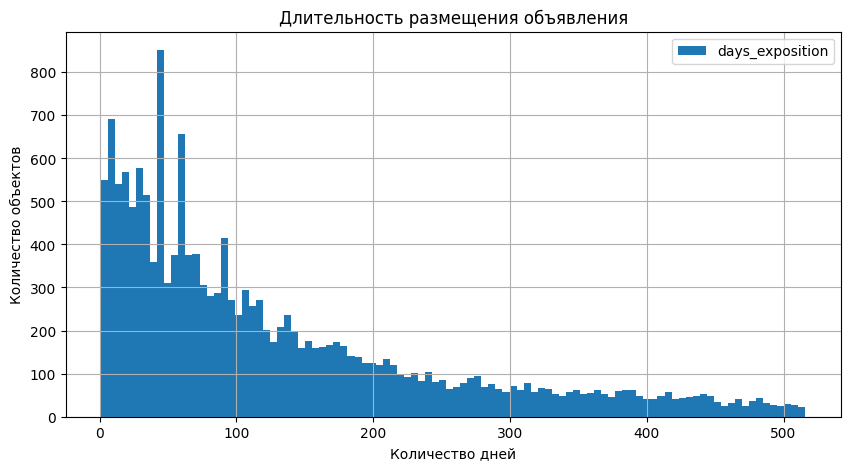

In [79]:
data.plot(
    kind='hist',
    y='days_exposition',
    grid=True,
    figsize=(10,5),
    bins=100
)
plt.title('Длительность размещения объявления')
plt.ylabel('Количество объектов')
plt.xlabel('Количество дней')
plt.show()

In [80]:
data['days_exposition'].value_counts()

days_exposition
45.0     533
60.0     355
7.0      206
30.0     191
4.0      158
        ... 
474.0      2
2.0        2
501.0      2
1.0        1
373.0      1
Name: count, Length: 516, dtype: int64

In [81]:
print('Среднее значение:', round(data['days_exposition'].describe()['mean']))
print('Медиана:', round(data['days_exposition'].describe()['50%']))

Среднее значение: 131
Медиана: 89


По графику видно, что чаще всего квартиры продаются за 60, 45 и 30 дней. Среднее значение - 135, медиана - 90. Еще заметим, что чем дольше срок размещения объявление, тем меньше объектов на графике. Значит, что "хорошие" квартиры продаются в течение полугода или меньше. 

**3. Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта.**
**Изучите, зависит ли цена от:**

- **общей площади;**
- **жилой площади;**
- **площади кухни;**
- **количества комнат;**
- **этажа, на котором расположена квартира (первый, последний, другой);**
- **даты размещения (день недели, месяц, год).**

**Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.**

In [82]:
selected_columns = [
    'last_price',
    'total_area',
    'living_area',
    'kitchen_area',
    'rooms'
]
# найдем коэффициент корреляции для всех пар столбцов
coeff_matrix = data[selected_columns].corr()
coeff_matrix['last_price']

last_price      1.000000
total_area      0.763110
living_area     0.651867
kitchen_area    0.541154
rooms           0.500100
Name: last_price, dtype: float64

Коэффициент Пирсона между `total_area` и `last_price` равна 0.809. Коэффициент ближе к крайнему значению 1, значит, что линейная связь теснее. Коэффициент положительный - чем больше общая площадь объекта, тем выше цена. Чуть меньше коэффициент Пирсона между `living_area` и `last_price` - 0.71, тоже положительный и ближе к единице. 

Коэффициенты `kitchen_area` и `rooms` равны 0.58 и 0.55 соответственно. 

**Зависимость цены от общей площади**

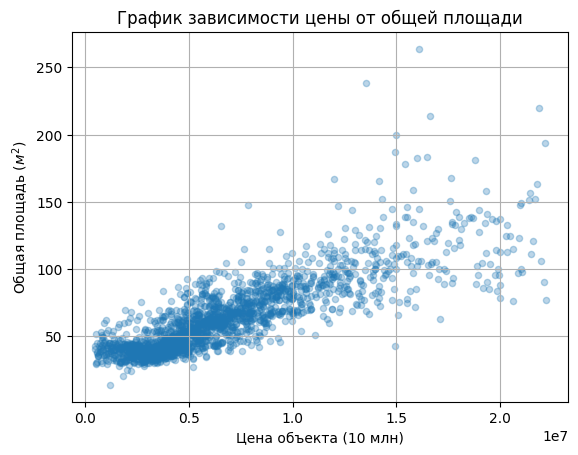

In [83]:
data.pivot_table(index=['last_price'], values=['total_area']).reset_index().plot(
    x='last_price', y='total_area', kind='scatter', grid=True, alpha=0.3)
plt.title('График зависимости цены от общей площади')
plt.xlabel('Цена объекта (10 млн)')
plt.ylabel('Общая площадь ($м^2$)')
plt.show()

Больше всего квартир собралось в самом углу, где общая площадь не больше 75 $м^2$, а цена на них не больше 10 млн рублей. Чем больше общая площадь, тем выше цена на объект. 

**Зависимость цены от жилой площади**

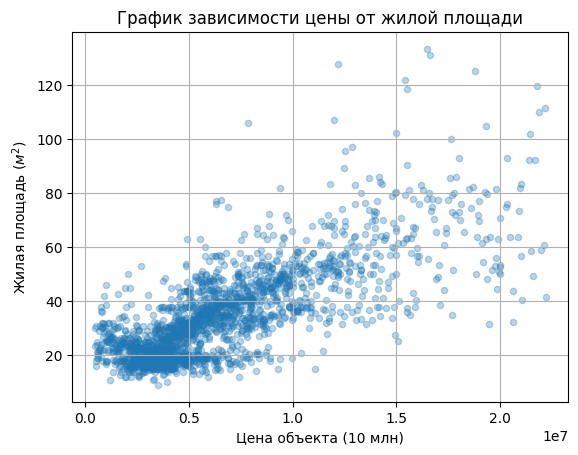

In [84]:
data.pivot_table(index=['last_price'], values=['living_area']).reset_index().plot(
    x='last_price', y='living_area', kind='scatter', grid=True, alpha=0.3)
plt.title('График зависимости цены от жилой площади')
plt.xlabel('Цена объекта (10 млн)')
plt.ylabel('Жилая площадь ($м^2$)')
plt.show()

То же самое, что и с общей площадью. Чем больше жилая площадь, тем больше цена. Больше всего квартир имеют жилую площадь не больше 60 $м^2$, и стоимость этих квартир не больше 10 миллионов рублей. 

**Зависимость цены от площади кухни**

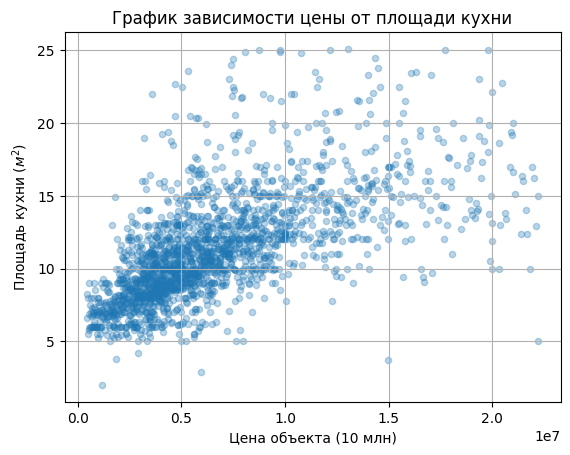

In [85]:
data.pivot_table(index=['last_price'], values=['kitchen_area']).reset_index().plot(
    x='last_price', y='kitchen_area', kind='scatter', grid=True, alpha=0.3)
plt.title('График зависимости цены от площади кухни')
plt.xlabel('Цена объекта (10 млн)')
plt.ylabel('Площадь кухни ($м^2$)')
plt.show()

На графике видно, что не всегда с увеличением площади кухни растет и цена на объект. Некоторые квартиры имеют площадь больше 15 $м^2$, но цена на них не больше 10 миллионов рублей. 

**Зависимость цены от количества комнат**

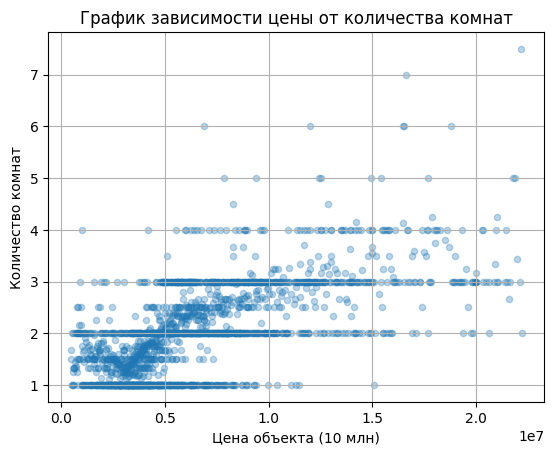

In [86]:
data.pivot_table(index=['last_price'], values=['rooms']).reset_index().plot(
    x='last_price', y='rooms', kind='scatter', grid=True, alpha=0.3)
plt.title('График зависимости цены от количества комнат')
plt.xlabel('Цена объекта (10 млн)')
plt.ylabel('Количество комнат')
plt.show()

Однокомнатные квартиры имеют стоимоть около 5 миллионов рублей, двухкомнатные квартиры - от 5 млн рублей до 10 млн рублей, трехкомнатные - от 5 миллионов рублей до 15 млн рублей. Но с увеличением количества комнат в квартире не всегда растет их стоимость. Некоторые двухкомнатные и трехкомнатные квартиры стоят больше 10 миллионов рублей, а квартиры, имеющие больше трех комнат, не имеют таких четких границ диапозона стоимости. Они могут стоить меньше или больше 10 миллионов рублей. 

**Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)**

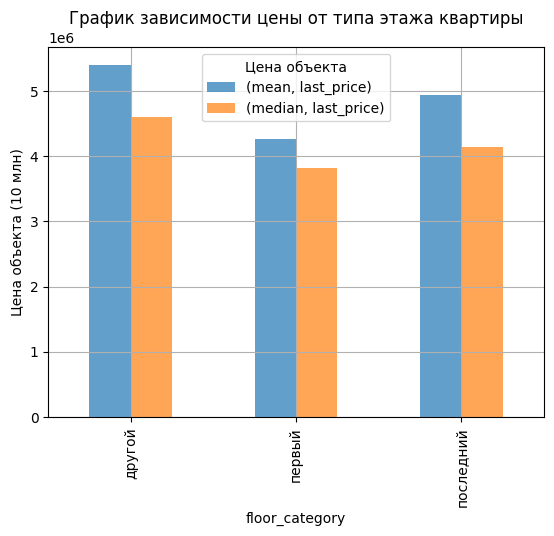

In [87]:
data.pivot_table(index=['floor_category'], values=['last_price'], aggfunc=['mean', 'median']).plot(
    kind='bar', grid=True, alpha=0.7
)
plt.legend(title='Цена объекта')
plt.title('График зависимости цены от типа этажа квартиры')
plt.ylabel('Цена объекта (10 млн)')
plt.show()

Цены на квартиры, находящиеся на первом этаже, ниже, чем на квартиры на последнем и других этажах.

**Зависимость цены от дня недели размещения объявления**

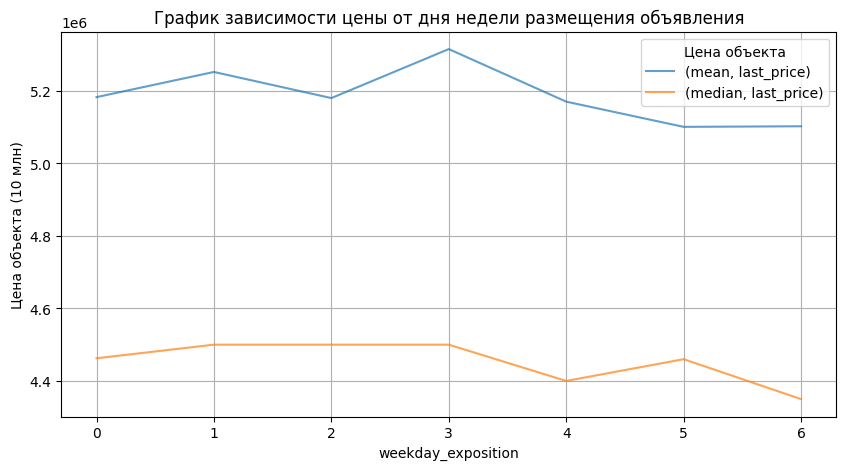

In [88]:
data.pivot_table(index=['weekday_exposition'], values=['last_price'], aggfunc=['mean', 'median']).plot(
    kind='line', grid=True, alpha=0.7, figsize=(10,5)
)
plt.legend(title='Цена объекта')
plt.title('График зависимости цены от дня недели размещения объявления')
plt.ylabel('Цена объекта (10 млн)')
plt.show()

**Зависимость цены от месяца размещения объявления**

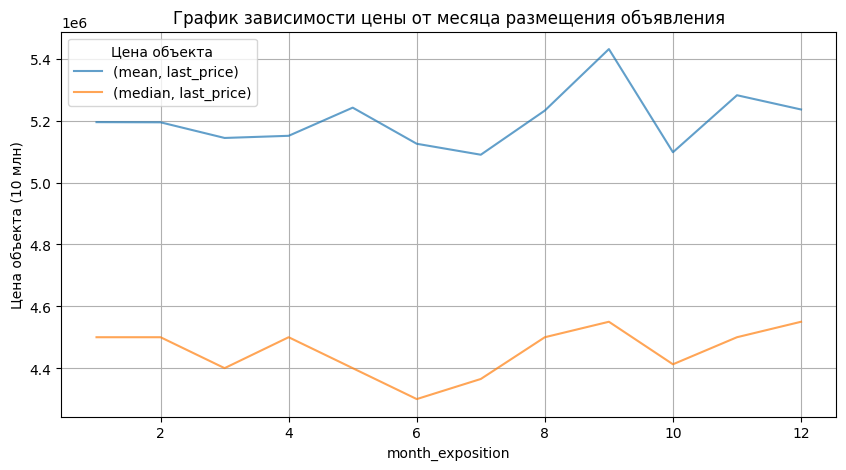

In [89]:
data.pivot_table(index=['month_exposition'], values=['last_price'], aggfunc=['mean', 'median']).plot(
    kind='line', grid=True, alpha=0.7, figsize=(10,5)
)
plt.legend(title='Цена объекта')
plt.title('График зависимости цены от месяца размещения объявления')
plt.ylabel('Цена объекта (10 млн)')
plt.show()

**Зависимость цены от года размещения объявления**

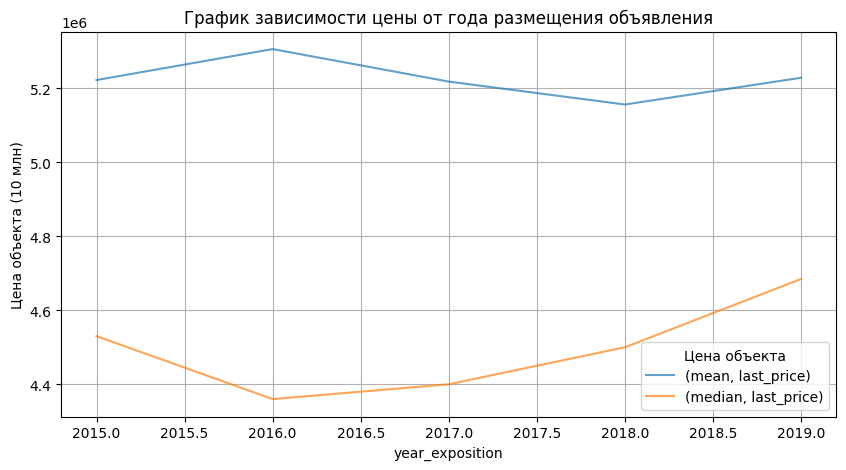

In [90]:
data.pivot_table(index=['year_exposition'], values=['last_price'], aggfunc=['mean', 'median']).plot(
    kind='line', grid=True, alpha=0.7, figsize=(10,5)
)
plt.legend(title='Цена объекта')
plt.title('График зависимости цены от года размещения объявления')
plt.ylabel('Цена объекта (10 млн)')
plt.show()

**4. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.**

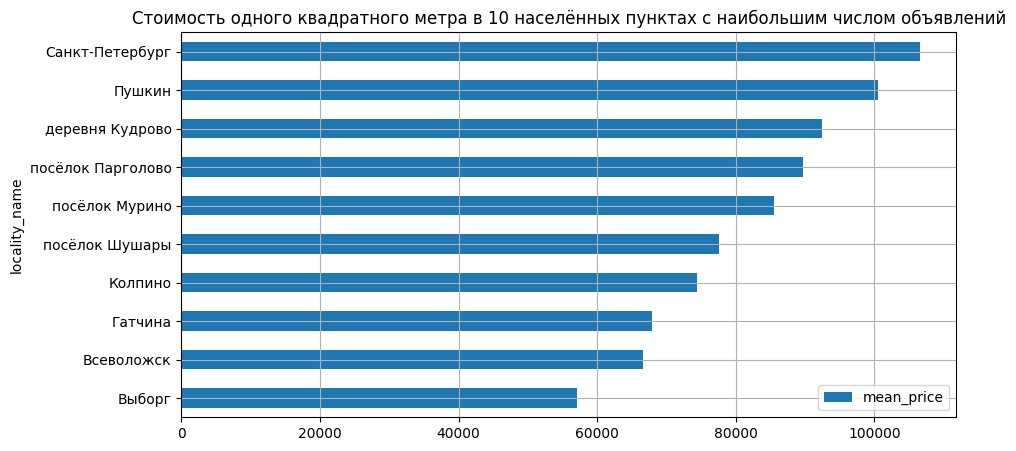

In [91]:
df = data.groupby('locality_name').agg(
    total_ads=('first_day_exposition', 'count'), 
    mean_price=('price_per_one_square_meter', 'mean')).sort_values(
        by='total_ads', ascending=False).reset_index()

df[:10].sort_values(by='mean_price').plot(
    x='locality_name', y='mean_price', kind='barh', grid=True, figsize=(10,5))
plt.title('Стоимость одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений')
plt.show()

Наибольшая средняя цена одного квадратного метра в Санкт-Петербурге (106506 руб.), что было ожидаемо. Далее на втором месте крупный туристический город Пушкин (100585 руб.). Другие населенные пункты в нашем топ-10 являются популярными города в Ленинградской области, например, Выборг, Всеволжск, Гатчина, Кудрово, Мурино. самая низкая средняя стоимость квадратного метра в Выборге (меньше 60000 руб.)

**5. Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.**

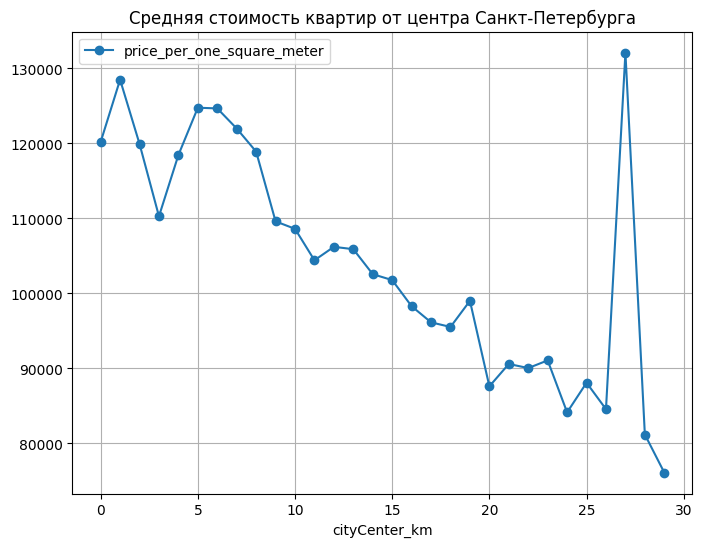

In [92]:
data.loc[data['locality_name'] == 'Санкт-Петербург'].pivot_table(
    index='cityCenter_km', values='price_per_one_square_meter').plot(
        style='o-', grid=True, figsize=(8, 6))

plt.title('Средняя стоимость квартир от центра Санкт-Петербурга')
plt.show()

На графике видим, что стоимость квартир начинает уменьшается после 5 километра от центра Санкт-Петербурга, но после 25 километра наблюдается резкий скачок в цене. 

### Напишите общий вывод

Мы нашли и заполнили пропущенные значения там, где это возможно. Установили корректный тип данных в датафрейме. Удалили неявные дубликаты в названиях населенных пунктов. Добавили в таблицу новые столбцы для того, чтобы провести исследовательский анализ данных. Удалили выбросы и аномалии из таблицы и построили гистограммы для всех параметров из списка. 

Изучили, как быстро продавались квартиры и получили, что чаще всего квартиры продаются за 1-2 месяца. Также мы изучили, отчего зависит цена объекта недвижимости, и нашли, что основными факторами, влияющими на цену продажи квартиры, являются общая площадь, жилая площадь и площадь кухни. День недели, месяц и год размещения объявления не оказывают влияния на цену. Количество комнат также влияет на цену продажи, но связь не такая сильная, как с площадью.

Еще мы посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений и получили, что самая наибольшая средняя цена одного квадратного метра в Санкт-Петербурге, другие места в топ-10 занимают известные города в Ленинградской области, но самая низкая средняя стоимость квадратного метра в Выборге. 

Нашли, что стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге. Чем дальше от центра, тем цена на объект ниже. 